In [65]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [66]:
# Read the CSV
file = "Resources/vgsales-12-4-2019.csv"

In [67]:
# Check Data
df = pd.read_csv(file)
df.head()
df.count()

Rank              55792
Name              55792
basename          55792
Genre             55792
ESRB_Rating       23623
Platform          55792
Publisher         55792
Developer         55775
VGChartz_Score        0
Critic_Score       6536
User_Score          335
Total_Shipped      1827
Global_Sales      19415
NA_Sales          12964
PAL_Sales         13189
JP_Sales           7043
Other_Sales       15522
Year              54813
Last_Update        9186
url               55792
status            55792
Vgchartzscore       799
img_url           55792
dtype: int64

In [82]:
# Only take games that released in 2009 or newer
df2 = df[df['Year'] >= 2009]
df2.count()

Rank              24744
Name              24744
basename          24744
Genre             24744
ESRB_Rating       10486
Platform          24744
Publisher         24744
Developer         24740
VGChartz_Score        0
Critic_Score       2943
User_Score          188
Total_Shipped      1076
Global_Sales       9099
NA_Sales           5515
PAL_Sales          5325
JP_Sales           3986
Other_Sales        6755
Year              24744
Last_Update        7708
url               24744
status            24744
Vgchartzscore       547
img_url           24744
dtype: int64

In [69]:
# Narrow down columns
videoGames1_df = df2.loc[:, ["Name", "Genre", "Platform", "Critic_Score", "Global_Sales", "NA_Sales", "PAL_Sales", "JP_Sales", "Year"]]

In [70]:
videoGames1_df.head()

,Name,Genre,Platform,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Year
3,PlayerUnknown's Battlegrounds,Shooter,PC,NaN,NaN,NaN,NaN,NaN,2017.0
4,Wii Sports Resort,Sports,Wii,8.0,NaN,NaN,NaN,NaN,2009.0
8,New Super Mario Bros. Wii,Platform,Wii,8.6,NaN,NaN,NaN,NaN,2009.0
9,Minecraft,Misc,PC,10.0,NaN,NaN,NaN,NaN,2010.0
12,Kinect Adventures!,Party,X360,6.7,NaN,NaN,NaN,NaN,2010.0


In [71]:
# Drop NaN's
videoGames2_df = videoGames1_df.dropna()
videoGames2_df.head()

,Name,Genre,Platform,Critic_Score,Global_Sales,NA_Sales,PAL_Sales,JP_Sales,Year
19,Grand Theft Auto V,Action,PS3,9.4,20.32,6.37,9.85,0.99,2013.0
20,Grand Theft Auto V,Action,PS4,9.7,19.39,6.06,9.71,0.60,2014.0
40,Call of Duty: Modern Warfare 3,Shooter,X360,8.7,14.82,9.07,4.29,0.13,2011.0
41,Call of Duty: Black Ops,Shooter,X360,8.8,14.74,9.76,3.73,0.11,2010.0
45,Red Dead Redemption 2,Action-Adventure,PS4,9.8,13.94,5.26,6.21,0.21,2018.0


In [72]:
genre_type = len(videoGames2_df["Genre"].unique())
# Get average critic ratings by Genre Type
critic_score = videoGames2_df.groupby(["Genre"]).mean()["Critic_Score"]
# Get global sales of each type of Genre
global_sales = videoGames2_df.groupby(["Genre"]).sum()["Global_Sales"]
# Where do games with high ratings but low sales land?
# Does critic ratings affect the amount of sales?
videoGames3_df = videoGames2_df.drop(columns=["Name", "Platform", "Year", "NA_Sales", "PAL_Sales", "JP_Sales"])
# Break down the global sales of each Genre by year
videoGames3_df.set_index(["Genre"])

,Critic_Score,Global_Sales
Genre,,
Action,9.4,20.32
Action,9.7,19.39
Shooter,8.7,14.82
Shooter,8.8,14.74
Action-Adventure,9.8,13.94
...,...,...
Puzzle,7.9,0.07
Fighting,8.0,0.07
Role-Playing,7.0,0.07


In [73]:
# Get the Average Critic score per genre and total global sales
avg_critic_score = videoGames3_df.groupby(["Genre"]).mean()["Critic_Score"]
tot_global_sales = videoGames3_df.groupby(["Genre"]).sum()["Global_Sales"]

video_game_sum = pd.DataFrame({"Avg Critic Score": avg_critic_score,
                               "Global Sales": tot_global_sales
                              })

video_game_sum

,Avg Critic Score,Global Sales
Genre,,
Action,7.460432,231.46
Action-Adventure,7.996970,66.72
Adventure,7.612903,29.35
Board Game,5.300000,0.30
Fighting,7.419608,36.83
Misc,6.858333,25.38
Music,8.700000,4.08
Party,5.733333,1.61
Platform,7.420000,29.25


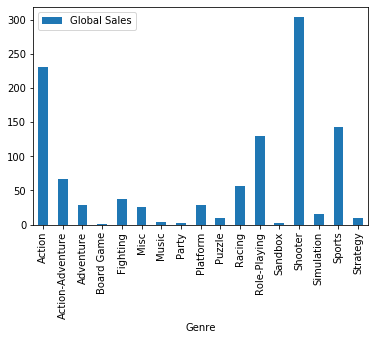

In [80]:
# Create a bar chart to see the difference in global sales by game genres
video_game_sum.plot.bar(y='Global Sales')
# We can see here that shooter and action games dominate in game sales globally

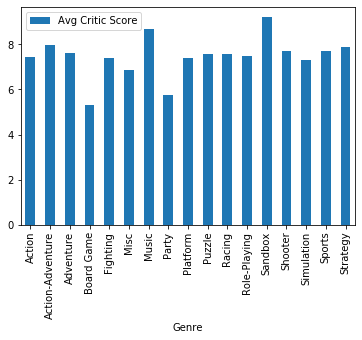

In [81]:
# Create Bar chart to see if the average critic scores influence sales of video games
video_game_sum.plot.bar(y='Avg Critic Score')
# There's no coorelation here, the critic score doesn't determine how well games will sell.